# HW05 - Taming Text

In [2]:
import matplotlib.pyplot as plt
import nltk
import nltk.sentiment.util
import numpy as np
import pandas as pd
import pycountry
import re
import seaborn as sns

from wordcloud import WordCloud

## 1. Word Cloud

Getting the data

In [3]:
emails=pd.DataFrame.from_csv('./hillary-clinton-emails/Emails.csv')
emails.head(3)

,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,MetadataDocumentClass,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
Id,,,,,,,,,,,,,,,,,,,,,
1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,HRC_Email_296,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,HRC_Email_296,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,HRC_Email_296,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...


The fields that contains relevant english words are 'ExtractedBodyText' and 'ExtractedSubject'

### Using Python word_cloud library on raw data

#### WordCloud based on e-mail body only

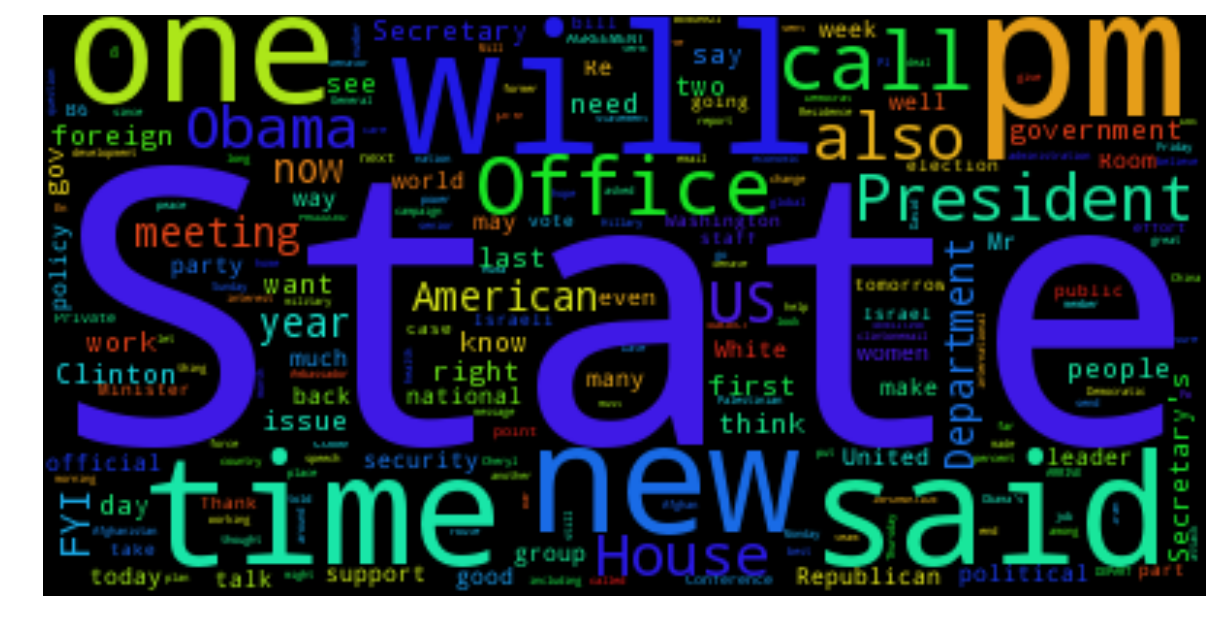

In [4]:
wordcloud_body = WordCloud().generate(' '.join(emails.ExtractedBodyText.dropna()))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud_body)
plt.axis('off')
plt.show()
plt.close()

#### WordCloud based on e-mail body and subject

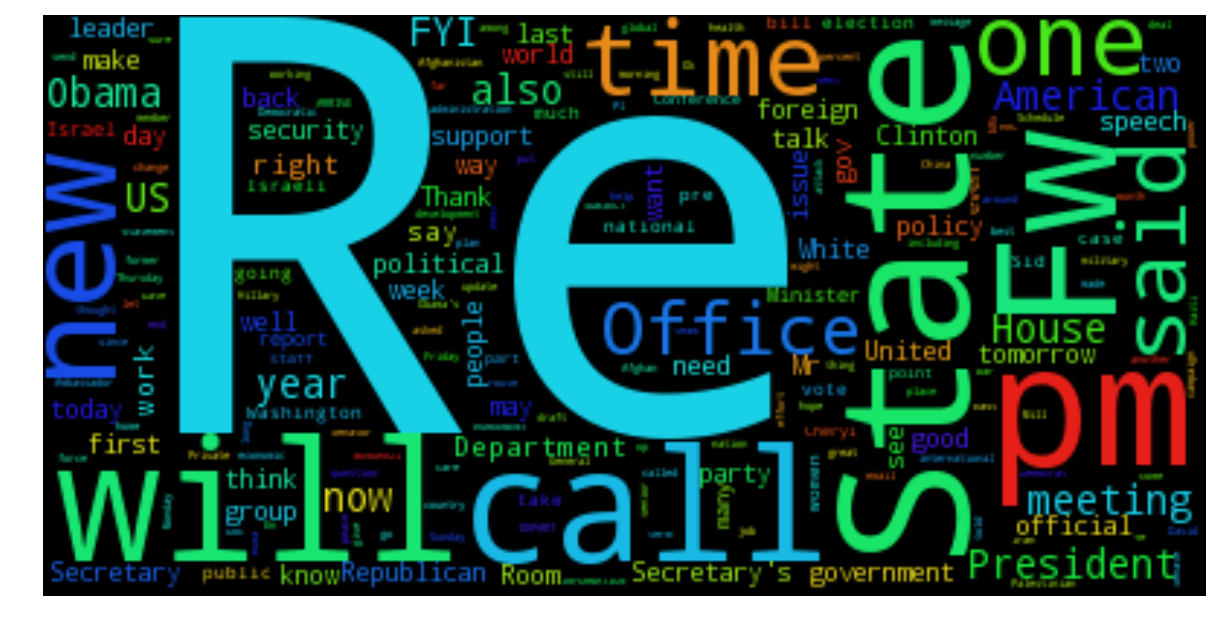

In [5]:
wordcloud_body_subj = WordCloud().generate(' '.join(emails.ExtractedBodyText.dropna()) +
                                           ' '.join(emails.ExtractedSubject.dropna()))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud_body_subj)
plt.axis('off')
plt.show()

What we can see is that there aren't many changes except that the e-mail keywords 'Re' and 'Fw' become very important and should be excluded from the cloud are they aren't content related words.

We ask ourselves if it is relevant to keep the subject, as the terms should also appear in the body?

In [6]:
emails_=emails[['ExtractedSubject', 'ExtractedBodyText']].copy()

small_words=list()
for i in range(len(emails_['ExtractedBodyText'])):
    s=str(emails_['ExtractedSubject'].iloc[i])
    e=str(emails_['ExtractedBodyText'].iloc[i])
    #take the bodytext that are less than 5 chars and smaller (i.e fewer information) than their subject
    if (len(e)<=5 and len(e)<len(s)):
        small_words.append(e)
print(len(small_words), "short text bodies, consting of " , set(small_words))

1506 short text bodies, consting of  {'4.-', '202', 'Nice!', 'state', 'Also,', 'I 96', 'FY1', 'sigh', 'rshah', '53', '--•', '94', 'I', 'Roger', '###', 'Yeah!', '241', 'Ahmet', '8', 'Thx.', 'Done', 'FYI\n^', 'More', 'FYI\n•', 'Fyi.', '###\n5', 'great', 'Yes.', 'Nice', '72', 'Dyi', '43', '4', 'More.', 'FFYI', '10', 'ok', 'Yep.', '98', 'yep', 'fyi\nc', '16', '_', '----', '2cin', 'Yes!', 'Y', '302', '62', 'Fyi,', '1 A', '2', '111A', 'Sid', '92', '130', '167', 'Great', '-----', '169', 'k', '-^', 'Fyi', 'FYI.', 'nan', 'Good.', 'FYI', 'Nope.', '67', 'Done.', 'I did', '14.0', 'B5', '34', 'B6', '21', '5', '17', 'this', 'Tx', '120', 'AM', '281', '-', 'Nice.', 'Aye', 'Ok', '291', 'XO', 'Yep', '15', 'ok\n>', 'FYi', 'B4\nB5', 'Thx', 'No.', 'done', 'Mike.', '--', '147', 'yes', 'K', 'Copy', '19', 'nice', 'Ok\n•', 'Yes', 'Wow', '18', 'Call', 'FY/', '70', 'fvl', '3pm', 'fyl', 'fvi', '!?', 'A)', 'Jm', '1/7', 'agree', '35', 'Ok.', 'fyi', 'fYI'}


So we can conclude that the subject might be interesting to keep for the cloud, removing the email subject tags, since many emails have an extremely short body or no body at all.

## Using Natural Language Toolkit

### Pre-processing

In [7]:
from nltk.corpus import stopwords

In [8]:
#concatenate all words
concatenated_words = ' '.join(list(emails.ExtractedBodyText.dropna())) + ' '.join(list(emails.ExtractedSubject.dropna()))

### Tokenization with punctuation removal

In [9]:
from nltk.tokenize import RegexpTokenizer

#We only tokenize alphanumerical characters
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(concatenated_words)

### Stopword removal

#### We first remove common english stopwords

In [10]:
english_stopwords = stopwords.words('english')
english_filtered_tokens = [token for token in tokens if token.lower() not in english_stopwords]
english_filtered_tokens[:10]

['B6', 'Thursday', 'March', '3', '2011', '9', '45', 'PM', 'H', 'Latest']

#### We further filter tokens by removing e-mail specific words and other arbitrary words.

In [11]:
email_stopwords = ['re', 'fw', 'fwd', 'subject', 'sent', 'to', 'from', 'date', 'attachments']
arbitrary_stopwords = ['state', 'pm', 'am', 'department', 'case', 'call', 'new', 'said', 'one', 'also', 'fm', 'pl', "a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the"]
extended_stopwords = english_stopwords + email_stopwords + arbitrary_stopwords

In [12]:
filtered_tokens = [token for token in tokens if token.lower() not in extended_stopwords]
filtered_tokens[:10]

['B6', 'Thursday', 'March', '3', '2011', '9', '45', 'H', 'Latest', 'Syria']

### Stemming

#### Using Porter Stemmer

In [13]:
from nltk.stem.porter import *

stemmer = PorterStemmer()
porter_stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

##### We generate the corresponding WordCloud (Porter Stemmer)

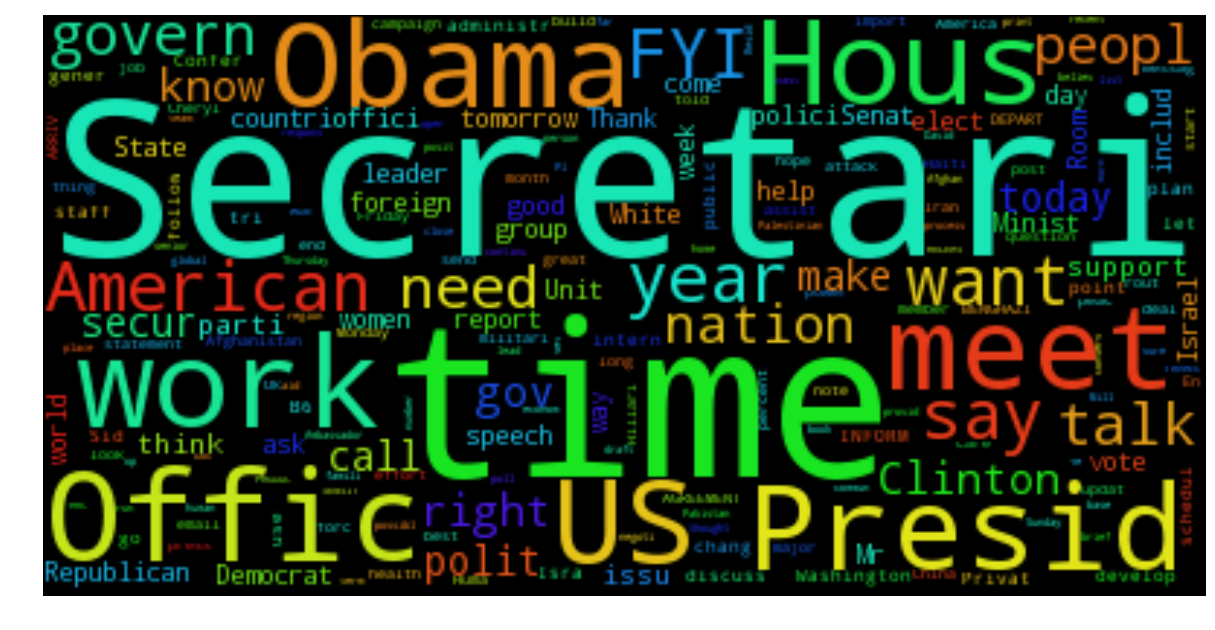

In [14]:
porter_filtered_wordcloud = WordCloud().generate(' '.join(porter_stemmed_tokens))

plt.figure(figsize=(15,10))
plt.imshow(porter_filtered_wordcloud)
plt.axis('off')
plt.show()

#### Using Snowball Stemmer

In [15]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english", ignore_stopwords=True)
snowball_stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

##### We generate the corresponding WordCloud (Snowball Stemmer)

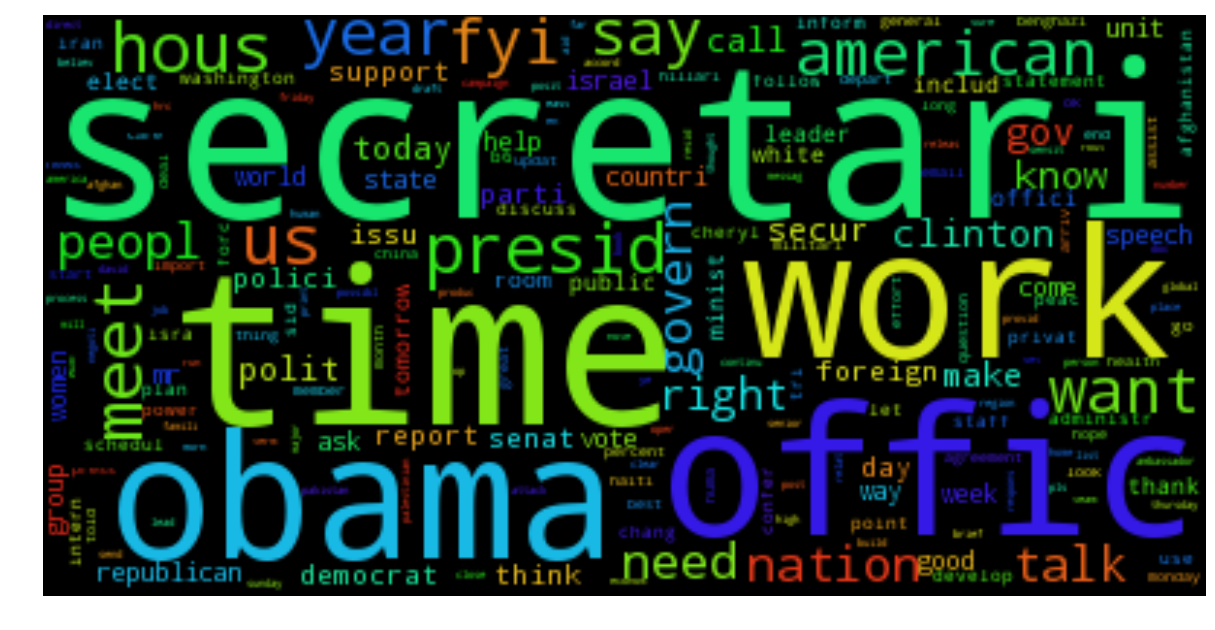

In [16]:
snowball_filtered_wordcloud = WordCloud().generate(' '.join(snowball_stemmed_tokens))

plt.figure(figsize=(15,10))
plt.imshow(snowball_filtered_wordcloud)
plt.axis('off')
plt.show()

The preprocessing steps change the word cloud a lot. Removing the email specific stopwords guarantee that the word cloud highlights actual content of the emails.
For the stemming step, we tried both the Porter Stemmer and the Snowball Stemmer. The latter is supposedly more efficient and more accurate than the former, although based on our resulting word clouds we can't really determine which is best.

### Using a Lemmatizer

In [17]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [18]:
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

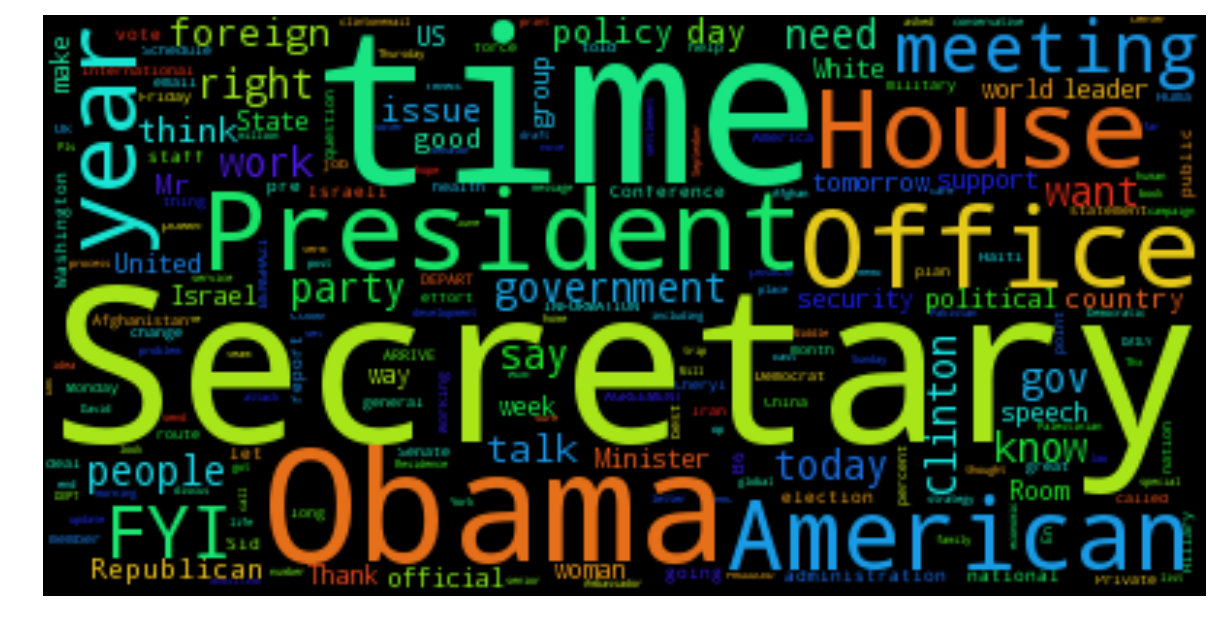

In [19]:
lemmatized_wordcloud = WordCloud().generate(' '.join(lemmatized_tokens))

plt.figure(figsize=(15,10))
plt.imshow(lemmatized_wordcloud)
plt.axis('off')
plt.show()

This last wordcloud is our favourite, since it displays full words and makes quite some sense considering our expectation of the emails content.

## 2. World Countries mentions in whole corpus

We start by building a DataFrame which will contain the frequency and sentiment for each country

In [20]:
countries = list(c.name for c in list(pycountry.countries))
countries_df = pd.DataFrame({'Country' : countries,
                             'Sentiment' : 0,
                             'Frequency' : 0})
countries_df.sample(3)

,Country,Frequency,Sentiment
201,San Marino,0,0
233,Uruguay,0,0
130,Sri Lanka,0,0


### Sentiment Analysis
Example analysis on the contents of an email:

Positive


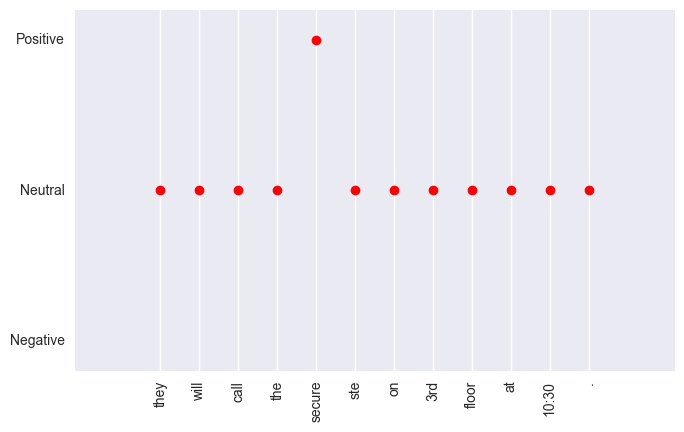

In [42]:
text = (emails.sample(1)['ExtractedBodyText']).str.cat()
sentiment = nltk.sentiment.util.demo_liu_hu_lexicon(text, plot = True)
sentiment

In [43]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
sid = SentimentIntensityAnalyzer()
email_tokenizer = RegexpTokenizer(r'\w+')

In [44]:
# Some words that need to be replaced so that pycountry recognizes correctly the countries.
rep = {"states": "us",
       "uk": "gbr",
       "syria": "syr",
       "russia": "rus"}

In [45]:
emails_df = emails[['ExtractedBodyText', 'ExtractedSubject']].dropna()
countries_df = pd.DataFrame({'Country' : countries,
                             'Sentiment' : 0,
                             'Frequency' : 0})

country_ignore_tokens = set()
for (index, email) in emails_df.iterrows():
    email_content = email['ExtractedSubject'] + " " + email['ExtractedBodyText']
    email_tokens = set(email_tokenizer.tokenize(email_content))
    filtered_email_tokens = {token for token in email_tokens if token.lower() not in extended_stopwords}
    countries_in_email = set()
    
    for token in filtered_email_tokens:
        if token not in country_ignore_tokens:
            try:
                country = pycountry.countries.lookup(rep.get(token.lower(), token))
                countries_in_email.add(country.name)
            except LookupError:
                pass
    
    sentiment = sid.polarity_scores(email_content)["compound"]
    for country in countries_in_email:
        countries_df.loc[countries_df['Country'] == country, 'Sentiment'] += sentiment
        countries_df.loc[countries_df['Country'] == country, 'Frequency'] += 1

In [46]:
#Average the total sentiment of a country over its occurence frequency
countries_df['avg sentiment'] = countries_df['Sentiment'] / countries_df['Frequency']
res = countries_df.dropna()

We filter the country sentiments keeping only countries that are mentionned at least 10 times.
This way we expect to keep more meaningful results.

In [47]:
countries_dfs = countries_df[countries_df.Frequency > 15]
countries_dfs

,Country,Frequency,Sentiment,avg sentiment
1,Afghanistan,104,36.6263,0.352176
2,Angola,91,43.7882,0.481189
5,Albania,66,5.6043,0.084914
8,Argentina,18,6.0060,0.333667
9,Armenia,24,9.6682,0.402842
14,Australia,21,7.8346,0.373076
19,Benin,20,8.8057,0.440285
23,Bulgaria,33,11.9090,0.360879
32,Brazil,28,13.8190,0.493536
39,Canada,24,7.7871,0.324463


We plot the sentiment associated to each country, and not surprisingly, the US is on top of the list.

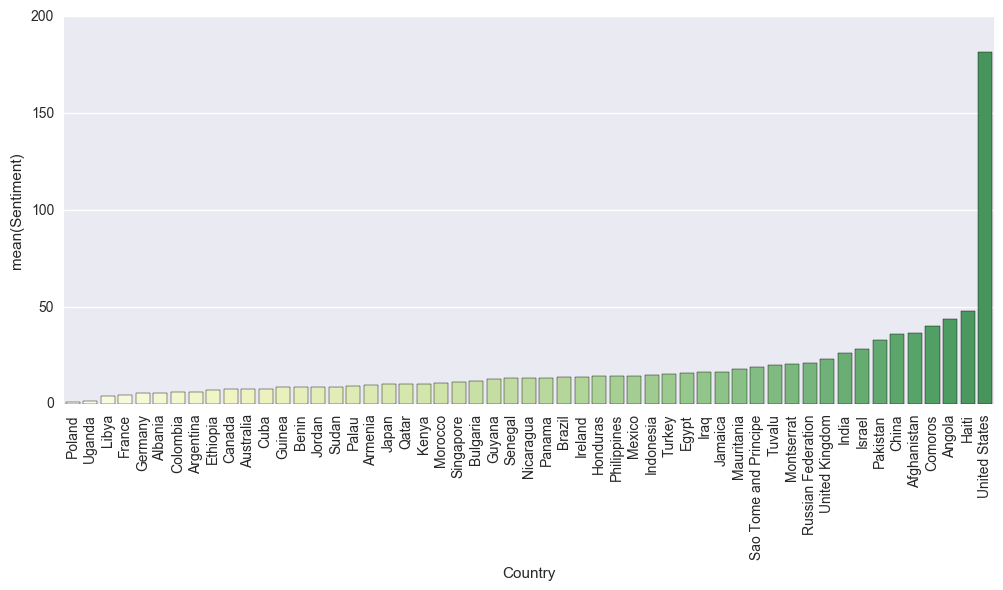

In [48]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
g = sns.barplot(x='Country', y='Sentiment' ,palette=sns.color_palette("YlGn", 80), data=countries_dfs.sort_values(by=['Sentiment']),)
g.set_xticklabels(countries_dfs.sort_values(by=['Sentiment']).Country, rotation=90)
plt.show()

However, if we take into account the frequency of each country's appearance in the emails
and take into account the average sentiment, the results completely differ.

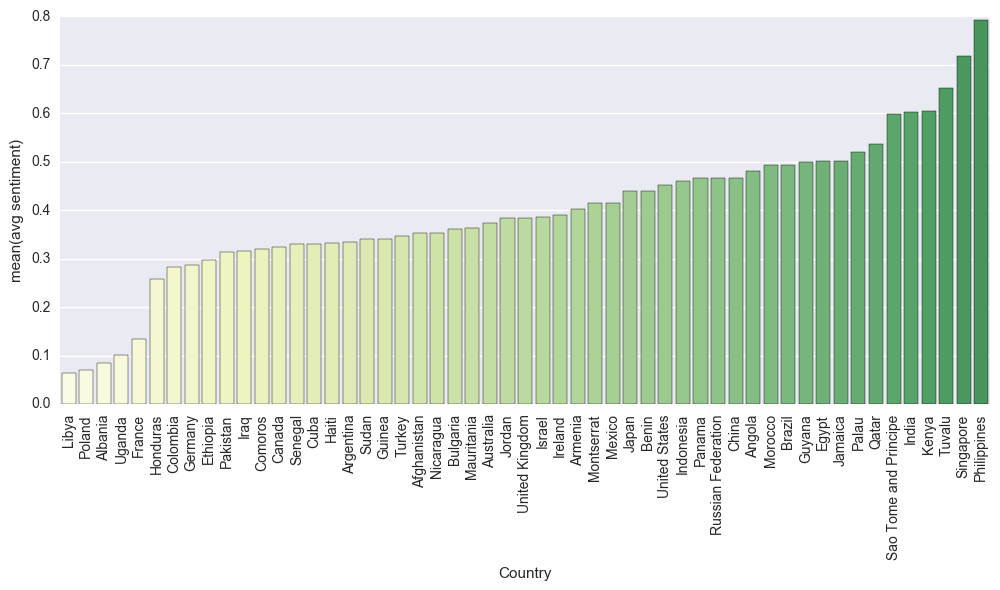

In [49]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
g = sns.barplot(x='Country', y='avg sentiment' ,palette=sns.color_palette("YlGn", 80), data=countries_dfs.sort_values(by=['avg sentiment']),)
g.set_xticklabels(countries_dfs.sort_values(by=['avg sentiment']).Country, rotation=90)
plt.show()

## 3. Topic Modeling

In [53]:
from gensim import corpora
import gensim.models.ldamodel

In [54]:
documents = list()
emails_df2 = emails[['ExtractedBodyText']].dropna(axis=0)

for (index, email) in emails_df2.iterrows():
    documents.append(email.str.cat())

In [55]:
all_tokens = list()
for document in documents:
    all_tokens.append(email_tokenizer.tokenize(document))

all_tokens_filtered = [[token for token in email_toks if token.lower() not in extended_stopwords]
                            for email_toks in all_tokens]
from collections import defaultdict
frequency = defaultdict(int)
for email_toks in all_tokens_filtered:
    for token in email_toks:
        frequency[token] += 1
        
all_frequent_tokens_filtered = [[token for token in email_toks if frequency[token] > 1]
         for email_toks in all_tokens_filtered]

In [56]:
dictionary = corpora.Dictionary(all_frequent_tokens_filtered)

In [57]:
corpus = [dictionary.doc2bow(email_toks) for email_toks in all_frequent_tokens_filtered]

In [58]:
def log_topics(topics):
    path = "logs/{}_topics.txt".format(len(topics))
    with open(path, "w") as text_file:
        text_file.write("")
    for (top, toks) in topics:
        tokens = list()
        for(token, prob) in toks:
            tokens.append(token)
        with open(path, "a") as text_file:
            text_file.write("Topic {} : {}\n".format(top+1, str(tokens)))

In [ ]:
for i in [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]:
    lda = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    log_topics(lda.show_topics(-1, num_words=5, log=False, formatted=False))